In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
from sqlalchemy import create_engine

# Database connection details
db_user = "postgres"
db_password = "30251421"  
db_host = "localhost"
db_port = "5432"
db_name = "telecom"
engine = create_engine(f"postgresql+pg8000://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")


In [3]:
query = "SELECT * FROM xdr_data;"
df = pd.read_sql(query, engine)

In [5]:
df["Total_Data_Volume"] = df["Total DL (Bytes)"] + df["Total UL (Bytes)"]
aggregated_df = df.groupby("MSISDN/Number").agg(
    num_sessions=("Bearer Id", "count"),
    total_duration=("Dur. (ms)", "sum"),
    total_download=("Total DL (Bytes)", "sum"),
    total_upload=("Total UL (Bytes)", "sum"),
    total_data=("Total_Data_Volume", "sum")
).reset_index()
print(aggregated_df.head())



   MSISDN/Number  num_sessions  total_duration  total_download  total_upload  \
0   3.360100e+10             2        233440.0    1.685275e+09    72106216.0   
1   3.360100e+10             2        362460.0    2.415104e+08    72208918.0   
2   3.360100e+10             2        269938.0    1.113319e+09    78613640.0   
3   3.360101e+10             2         99756.0    8.039863e+08    40655052.0   
4   3.360101e+10             4         74208.0    2.726261e+09   188561054.0   

     total_data  
0  1.757381e+09  
1  3.137193e+08  
2  1.191933e+09  
3  8.446414e+08  
4  2.914822e+09  


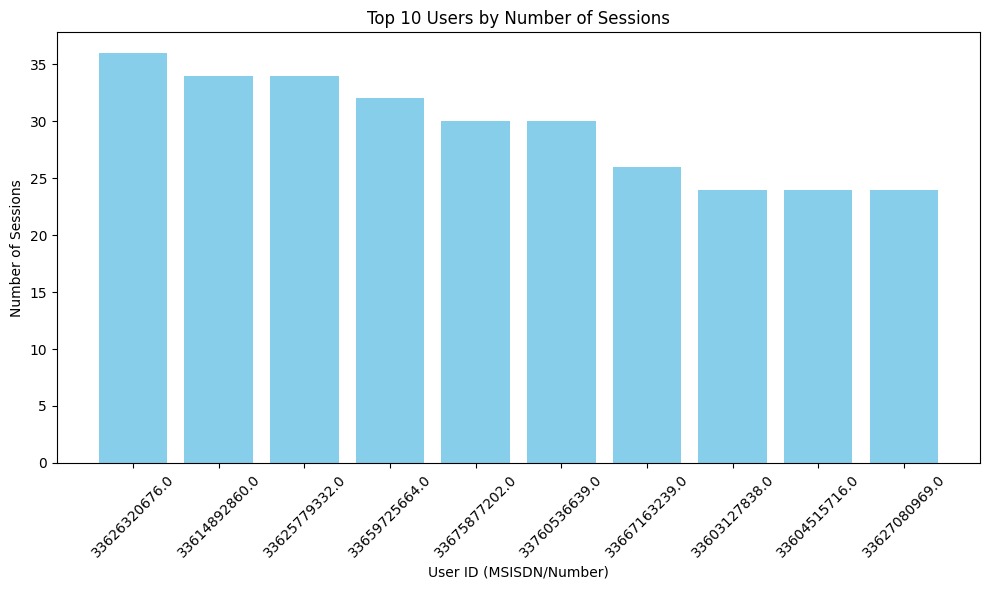

In [6]:
top_users = aggregated_df.nlargest(10, "num_sessions")

plt.figure(figsize=(10, 6))
plt.bar(top_users["MSISDN/Number"].astype(str), top_users["num_sessions"], color='skyblue')
plt.title("Top 10 Users by Number of Sessions")
plt.xlabel("User ID (MSISDN/Number)")
plt.ylabel("Number of Sessions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
for col in df.columns:
 if df[col].isnull().sum() > 0:
            if df[col].dtype in ['int64', 'float64']:
                df[col].fillna(df[col].mean(), inplace=True)
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\nadew\AppData\Local\Temp\ipykernel_16228\3660562770.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\nadew\AppData\Local\Temp\ipykernel_16228\3660562770.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [8]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(outliers)

Empty DataFrame
Columns: [Bearer Id, Start, Start ms, End, End ms, Dur. (ms), IMSI, MSISDN/Number, IMEI, Last Location Name, Avg RTT DL (ms), Avg RTT UL (ms), Avg Bearer TP DL (kbps), Avg Bearer TP UL (kbps), TCP DL Retrans. Vol (Bytes), TCP UL Retrans. Vol (Bytes), DL TP < 50 Kbps (%), 50 Kbps < DL TP < 250 Kbps (%), 250 Kbps < DL TP < 1 Mbps (%), DL TP > 1 Mbps (%), UL TP < 10 Kbps (%), 10 Kbps < UL TP < 50 Kbps (%), 50 Kbps < UL TP < 300 Kbps (%), UL TP > 300 Kbps (%), HTTP DL (Bytes), HTTP UL (Bytes), Activity Duration DL (ms), Activity Duration UL (ms), Dur. (ms).1, Handset Manufacturer, Handset Type, Nb of sec with 125000B < Vol DL, Nb of sec with 1250B < Vol UL < 6250B, Nb of sec with 31250B < Vol DL < 125000B, Nb of sec with 37500B < Vol UL, Nb of sec with 6250B < Vol DL < 31250B, Nb of sec with 6250B < Vol UL < 37500B, Nb of sec with Vol DL < 6250B, Nb of sec with Vol UL < 1250B, Social Media DL (Bytes), Social Media UL (Bytes), Google DL (Bytes), Google UL (Bytes), Email DL (

In [9]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, df[col].mean(), df[col])
        df[col] = np.where(df[col] > upper_bound, df[col].mean(), df[col])
print(outliers)

Empty DataFrame
Columns: [Bearer Id, Start, Start ms, End, End ms, Dur. (ms), IMSI, MSISDN/Number, IMEI, Last Location Name, Avg RTT DL (ms), Avg RTT UL (ms), Avg Bearer TP DL (kbps), Avg Bearer TP UL (kbps), TCP DL Retrans. Vol (Bytes), TCP UL Retrans. Vol (Bytes), DL TP < 50 Kbps (%), 50 Kbps < DL TP < 250 Kbps (%), 250 Kbps < DL TP < 1 Mbps (%), DL TP > 1 Mbps (%), UL TP < 10 Kbps (%), 10 Kbps < UL TP < 50 Kbps (%), 50 Kbps < UL TP < 300 Kbps (%), UL TP > 300 Kbps (%), HTTP DL (Bytes), HTTP UL (Bytes), Activity Duration DL (ms), Activity Duration UL (ms), Dur. (ms).1, Handset Manufacturer, Handset Type, Nb of sec with 125000B < Vol DL, Nb of sec with 1250B < Vol UL < 6250B, Nb of sec with 31250B < Vol DL < 125000B, Nb of sec with 37500B < Vol UL, Nb of sec with 6250B < Vol DL < 31250B, Nb of sec with 6250B < Vol UL < 37500B, Nb of sec with Vol DL < 6250B, Nb of sec with Vol UL < 1250B, Social Media DL (Bytes), Social Media UL (Bytes), Google DL (Bytes), Google UL (Bytes), Email DL (

sql data has been cleaned